In [44]:
import pandas as pd
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241028.csv")

In [45]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0


In [46]:
print(df.dtypes)
print(df.head())

Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object
         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  01/07/2019        15987        9962           407        21223    3715   
1  30/08/2024        16436       10705           225        19026    3925   
2  15/09/2023        15499       10671           267        18421    4519   
3  28/12/2021         1756        2352             0         3775       0   
4  11/01/2023        10536        8347           223        14072       0   

   Other  
0    NaN  
1   59.0  
2   61.0  
3   13.0  
4   48.0  


In [47]:
df.isna().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,2


In [48]:
# Handle NaN values in numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Option 1: Drop rows with NaN in numeric columns
df_dropped = df.dropna(subset=numeric_columns)

# Option 2: Fill NaN with mean (or median) for numeric columns
df_filled = df.fillna(df[numeric_columns].mean())


In [49]:
# Get summary statistics for numeric columns
summary_stats = df[numeric_columns].describe()
summary_stats


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1916.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.983299
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.760110
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


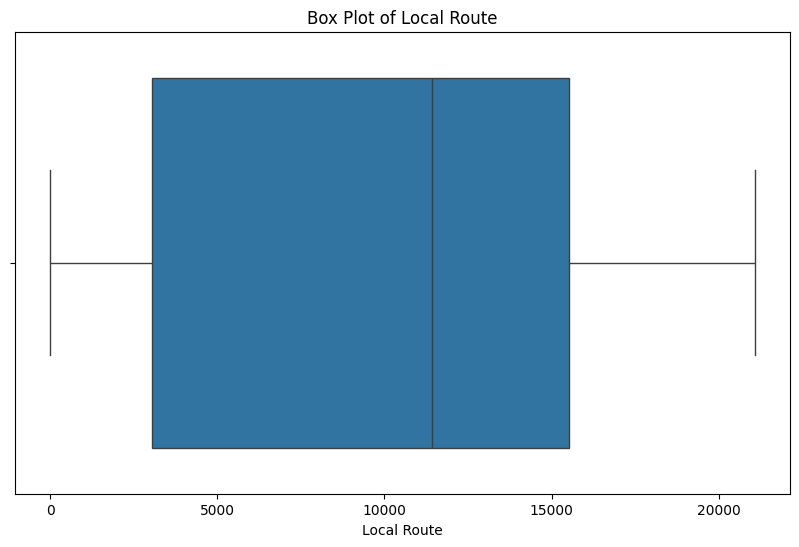

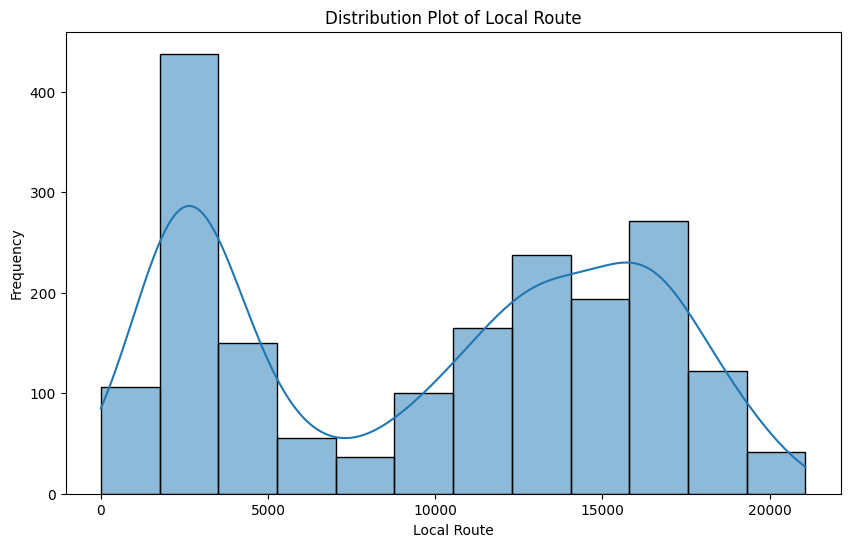

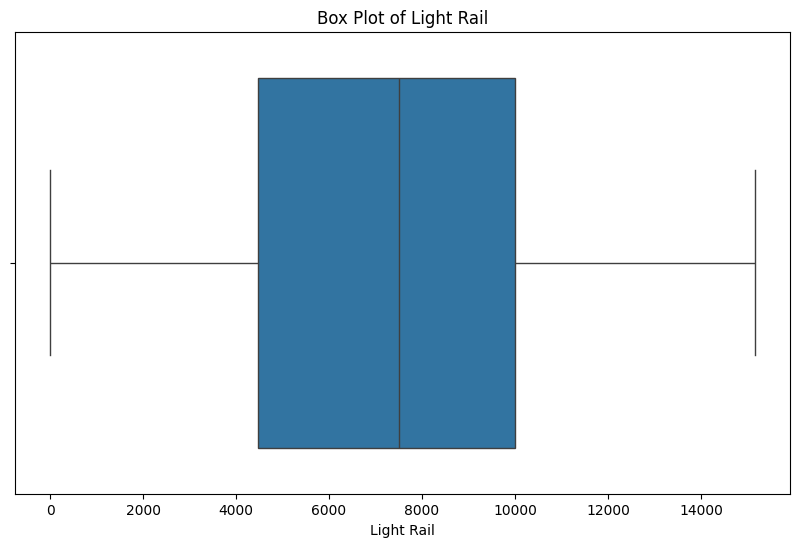

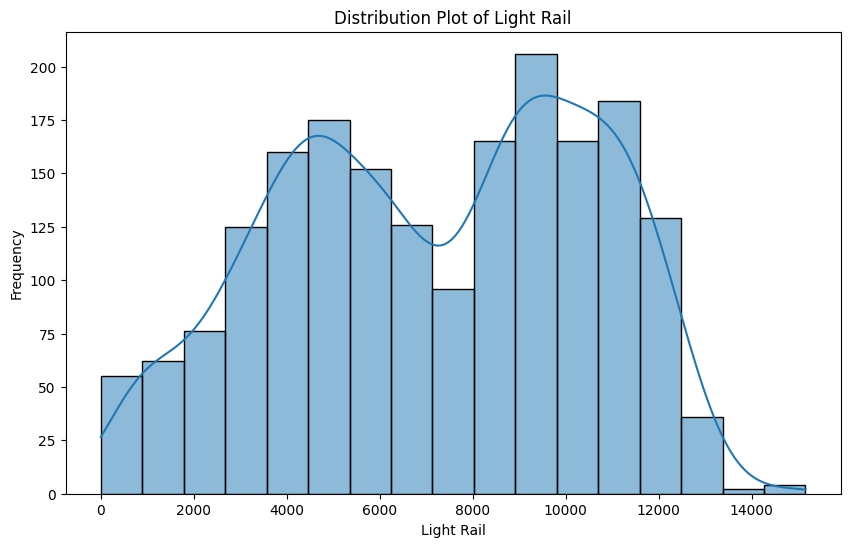

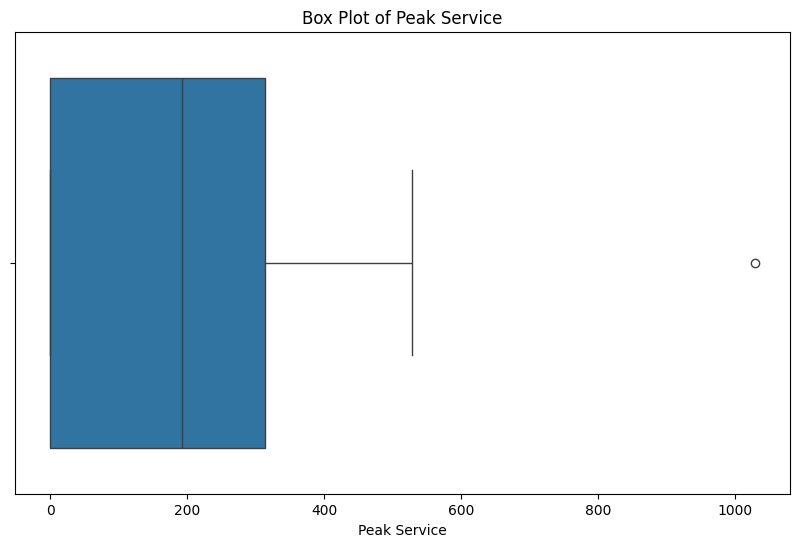

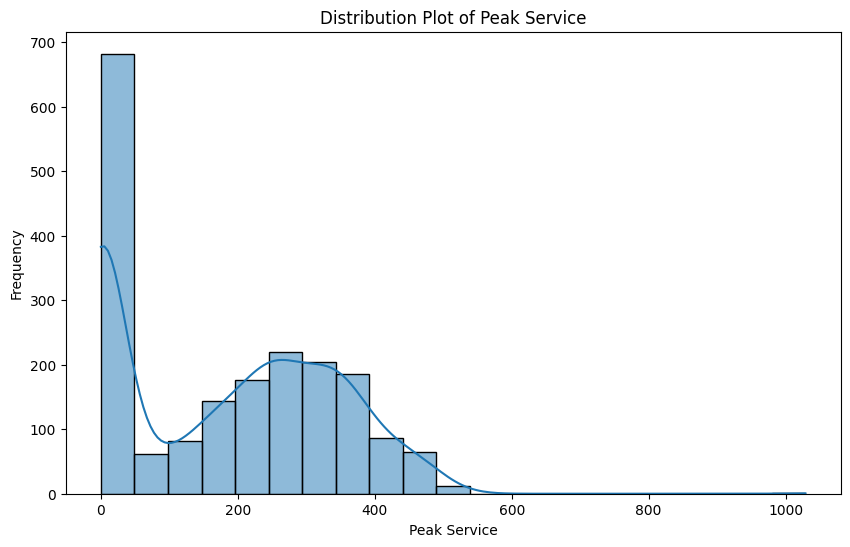

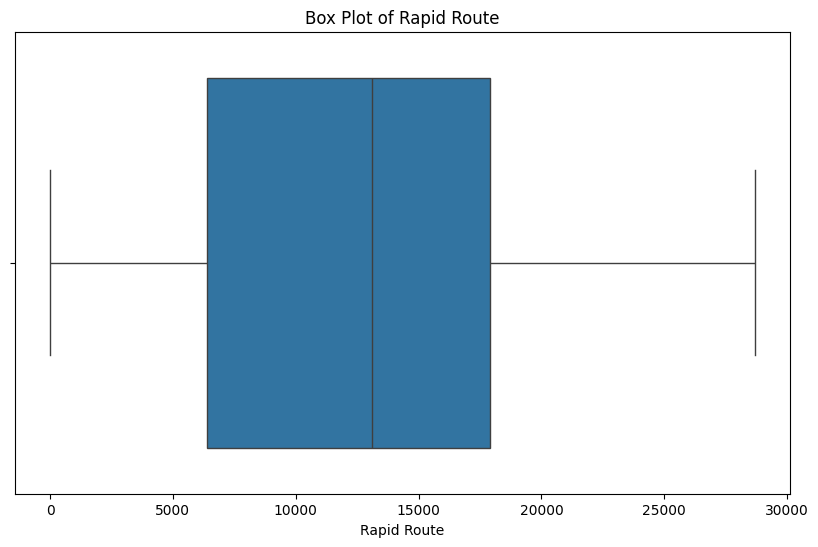

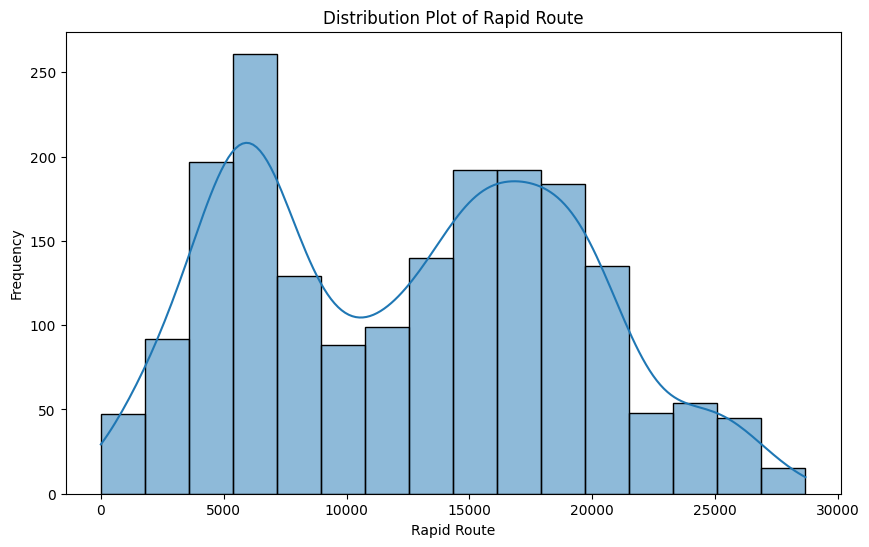

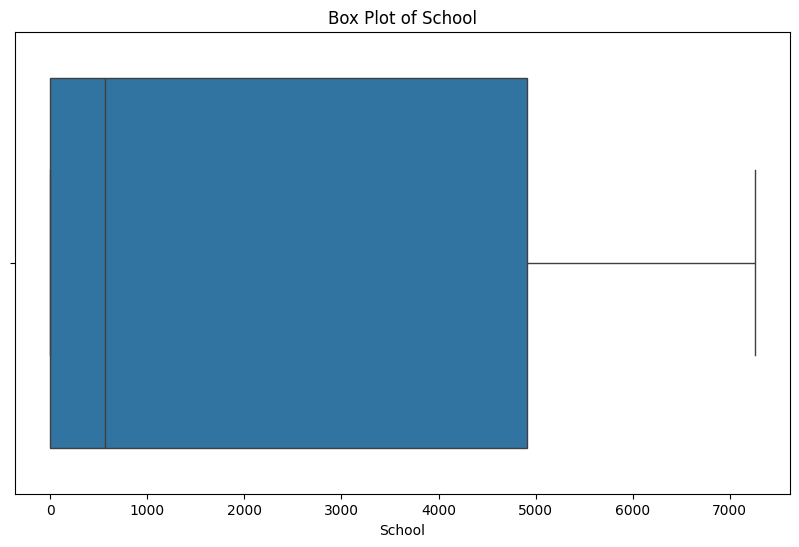

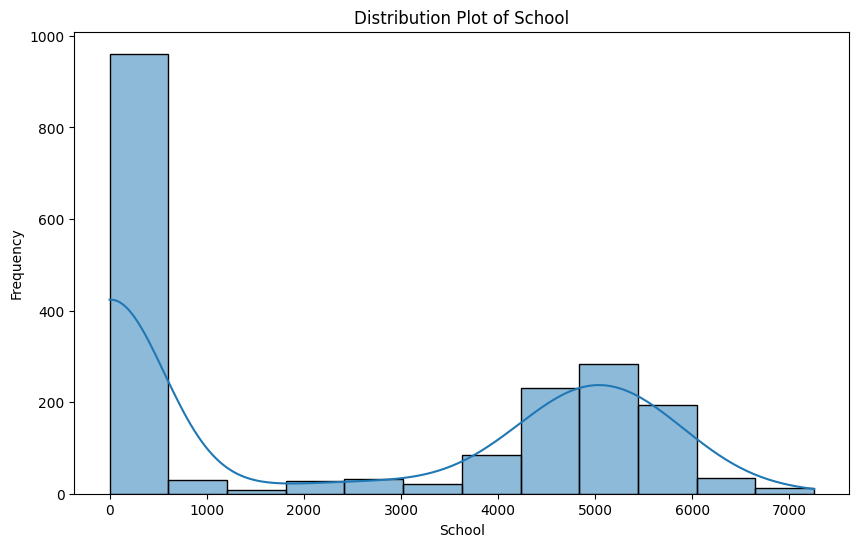

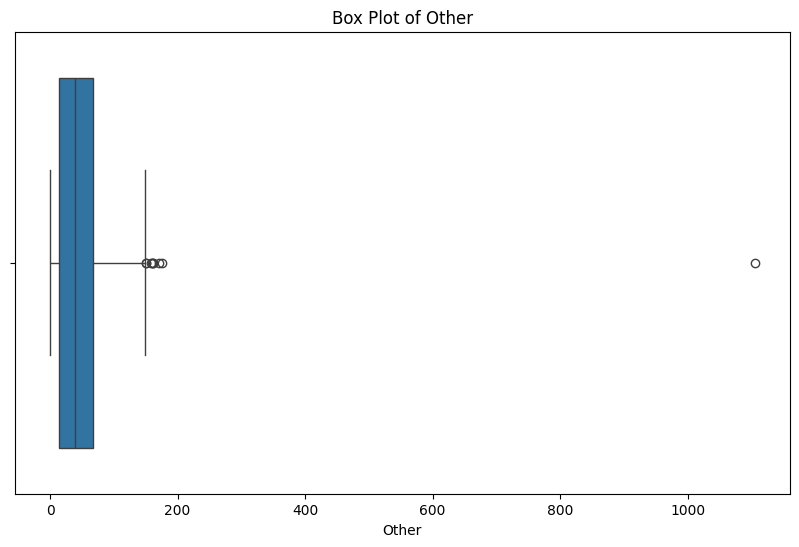

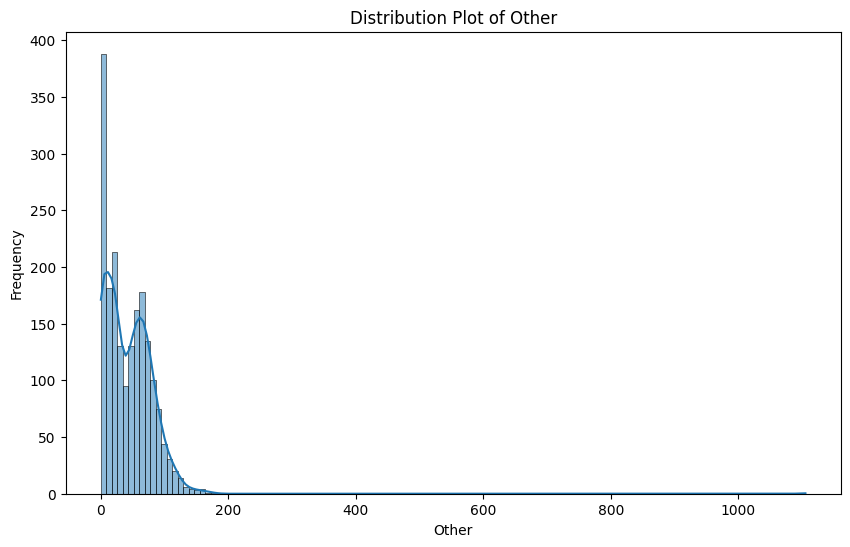

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through numeric columns to create plots
for column in numeric_columns:
    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

    # Distribution Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


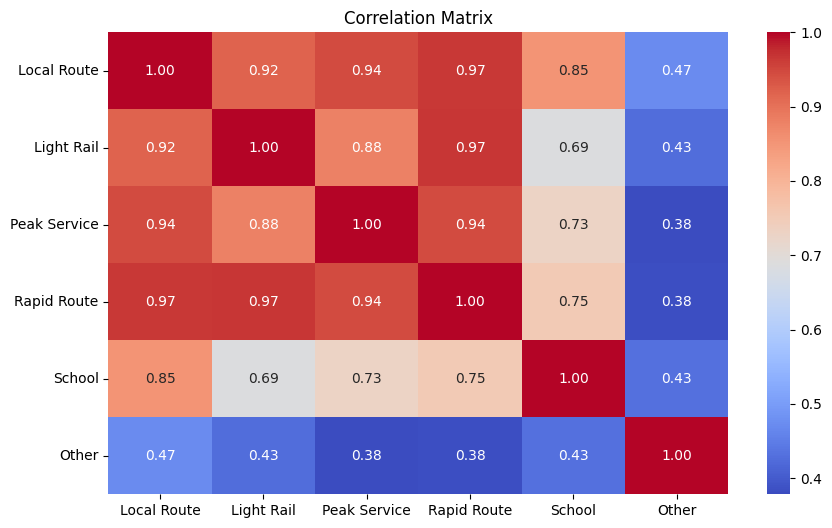

In [51]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()


# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [52]:
pip install statsmodels


In [53]:
df_filled

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,42.983299
1,30/08/2024,16436,10705,225,19026,3925,59.000000
2,15/09/2023,15499,10671,267,18421,4519,61.000000
3,28/12/2021,1756,2352,0,3775,0,13.000000
4,11/01/2023,10536,8347,223,14072,0,48.000000
...,...,...,...,...,...,...,...
1913,19/01/2023,11337,8671,262,14881,0,66.000000
1914,16/08/2023,16791,11800,387,20936,4684,113.000000
1915,10/01/2022,5732,3548,73,6644,0,25.000000
1916,04/05/2020,3717,1952,70,4411,131,19.000000


In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your data
df = df_filled

# Ensure Date is in datetime format, specifying the format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', dayfirst=True)

# Create separate columns for month, day, and year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year



In [55]:
df

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Month,Day,Year
0,2019-07-01,15987,9962,407,21223,3715,42.983299,7,1,2019
1,2024-08-30,16436,10705,225,19026,3925,59.000000,8,30,2024
2,2023-09-15,15499,10671,267,18421,4519,61.000000,9,15,2023
3,2021-12-28,1756,2352,0,3775,0,13.000000,12,28,2021
4,2023-01-11,10536,8347,223,14072,0,48.000000,1,11,2023
...,...,...,...,...,...,...,...,...,...,...
1913,2023-01-19,11337,8671,262,14881,0,66.000000,1,19,2023
1914,2023-08-16,16791,11800,387,20936,4684,113.000000,8,16,2023
1915,2022-01-10,5732,3548,73,6644,0,25.000000,1,10,2022
1916,2020-05-04,3717,1952,70,4411,131,19.000000,5,4,2020


In [56]:
df_sorted = df.sort_values(by=['Year', 'Month', 'Day'])

# Reset the index if needed
df_sorted.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
df_sorted

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Month,Day,Year
0,2019-07-01,15987,9962,407,21223,3715,42.983299,7,1,2019
1,2019-07-02,16895,10656,409,21715,3993,0.000000,7,2,2019
2,2019-07-03,16613,10658,427,22025,3638,0.000000,7,3,2019
3,2019-07-04,16604,10445,437,21868,3576,0.000000,7,4,2019
4,2019-07-05,16040,10532,400,20697,2856,0.000000,7,5,2019
...,...,...,...,...,...,...,...,...,...,...
1913,2024-09-25,21,0,1,10,8,0.000000,9,25,2024
1914,2024-09-26,9,0,0,0,2,0.000000,9,26,2024
1915,2024-09-27,6,0,0,13,0,0.000000,9,27,2024
1916,2024-09-28,1,0,0,4,0,1.000000,9,28,2024


In [57]:
import pandas as pd

# Specify the start date
start_date = pd.Timestamp(year=2024, month=9, day=29)

# Generate the next 7 days
next_7_days = pd.date_range(start=start_date, periods=7)

# Convert to DataFrame for display (optional)
next_7_days_df = pd.DataFrame(next_7_days, columns=['Date'])

# Display the next 7 days
print(next_7_days_df)

import pandas as pd



# Convert the 'Date' column to datetime
next_7_days_df['Date'] = pd.to_datetime(next_7_days_df['Date'])

# Create separate columns for Month, Day, and Year
next_7_days_df['Month'] = next_7_days_df['Date'].dt.month
next_7_days_df['Day'] = next_7_days_df['Date'].dt.day
next_7_days_df['Year'] = next_7_days_df['Date'].dt.year
next_7_days_df#test data

        Date
0 2024-09-29
1 2024-09-30
2 2024-10-01
3 2024-10-02
4 2024-10-03
5 2024-10-04
6 2024-10-05


,Date,Month,Day,Year
0,2024-09-29,9,29,2024
1,2024-09-30,9,30,2024
2,2024-10-01,10,1,2024
3,2024-10-02,10,2,2024
4,2024-10-03,10,3,2024
5,2024-10-04,10,4,2024
6,2024-10-05,10,5,2024


In [58]:
next_7_days_df

,Date,Month,Day,Year
0,2024-09-29,9,29,2024
1,2024-09-30,9,30,2024
2,2024-10-01,10,1,2024
3,2024-10-02,10,2,2024
4,2024-10-03,10,3,2024
5,2024-10-04,10,4,2024
6,2024-10-05,10,5,2024


In [59]:
df_sorted

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Month,Day,Year
0,2019-07-01,15987,9962,407,21223,3715,42.983299,7,1,2019
1,2019-07-02,16895,10656,409,21715,3993,0.000000,7,2,2019
2,2019-07-03,16613,10658,427,22025,3638,0.000000,7,3,2019
3,2019-07-04,16604,10445,437,21868,3576,0.000000,7,4,2019
4,2019-07-05,16040,10532,400,20697,2856,0.000000,7,5,2019
...,...,...,...,...,...,...,...,...,...,...
1913,2024-09-25,21,0,1,10,8,0.000000,9,25,2024
1914,2024-09-26,9,0,0,0,2,0.000000,9,26,2024
1915,2024-09-27,6,0,0,13,0,0.000000,9,27,2024
1916,2024-09-28,1,0,0,4,0,1.000000,9,28,2024


In [60]:
X=df_sorted[["Month","Day", "Year"]]
y=df_sorted["Local Route"]

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrame creation (replace with your sorted DataFrame)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 38354727.7717888, R-squared: -0.01052568683090449
Decision Tree - Mean Squared Error: 42114627.684895836, R-squared: -0.10958714972838313
Random Forest - Mean Squared Error: 28405381.963840365, R-squared: 0.2516080862444027
AdaBoost - Mean Squared Error: 32282576.334385887, R-squared: 0.14945628562194446


In [42]:
!